In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pandas as pd
# import yfinance as yf

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import models
import torch.nn.functional as F
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
folder_path = 'data/new_label_dataset/'

In [3]:
# print where is interpreter
import sys
print(sys.executable)

c:\Users\Pdogg Windows10\Desktop\Semester 7\Natural Language Processing\Project\nlp\Scripts\python.exe


In [4]:
start_date = "2017-01-01"
end_date = "2022-12-31"

In [5]:
stock_symbol = 'AUBANK.NS'

In [6]:
aubank_data = pd.read_csv(f'{folder_path}/{stock_symbol}.csv')

In [7]:
aubank_data.shape

(1322, 30)

In [8]:
aubank_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_21,EMA_9,...,BB_lower,ADX,ADX+DI,ADX-DI,CMF,OBV,CCI,Williams_%R,ATR,Target
0,2017-08-29,265.500000,279.399994,265.500000,272.399994,270.861786,1649802,268.661109,275.953571,269.747170,...,257.109623,46.315878,15.579860,27.511465,0.182936,-7916212.0,-22.486667,-43.905643,11.294367,0.00
1,2017-08-30,275.000000,278.875000,274.225006,275.424988,273.869659,712294,269.036109,275.057142,270.882733,...,258.701281,44.629755,14.862239,26.244265,0.162639,-7203918.0,24.239067,-22.460356,10.919995,0.53
2,2017-08-31,274.899994,278.225006,273.000000,274.725006,273.173615,580208,269.366665,274.077381,271.651188,...,260.456179,43.268357,14.290231,26.136532,0.141817,-7784126.0,30.892280,-16.461228,10.480352,0.50
3,2017-09-01,275.500000,285.000000,273.774994,276.149994,274.590576,1765988,270.174998,273.277380,272.550949,...,262.568087,40.724434,18.056729,23.999530,0.124248,-6018138.0,96.957914,-36.875025,10.537509,0.51
4,2017-09-04,277.875000,282.149994,271.024994,278.500000,276.927307,1182770,271.108331,272.682142,273.740759,...,262.630387,38.798966,16.607432,24.057285,0.144057,-4835368.0,88.353220,-27.083333,10.582363,0.52
5,2017-09-05,280.049988,288.250000,276.575012,286.575012,284.956726,1989224,273.533332,273.030952,276.307610,...,261.445038,36.017884,19.571585,22.056518,0.186246,-2846144.0,177.568397,-6.146744,10.665375,0.57
6,2017-09-06,284.000000,289.000000,281.799988,283.924988,282.321686,1157354,275.899997,273.353571,277.831085,...,260.914892,33.384987,19.092384,20.902004,0.166896,-4003498.0,160.379632,-18.125044,10.403286,0.48
7,2017-09-07,285.625000,288.000000,277.500000,279.350006,277.772491,815452,277.336110,273.527380,278.134870,...,261.370567,31.613485,17.642099,22.425050,0.090621,-4818950.0,117.262176,-34.464264,10.410570,0.47
8,2017-09-08,280.500000,282.750000,275.000000,277.174988,275.609802,831916,278.247220,273.194047,277.942893,...,261.367084,30.339722,16.637531,22.984957,0.036877,-5650866.0,67.870040,-42.232186,10.210966,0.49
9,2017-09-11,279.375000,282.450012,275.500000,279.299988,277.722839,697004,279.013885,273.401188,278.214312,...,261.489833,29.181880,15.770295,21.786860,0.068276,-4953862.0,69.590690,-34.642901,9.967196,0.52


In [9]:
sample_data = aubank_data['Close'].values
print(len(sample_data))

1322


In [10]:
reduced_data = sample_data[:30]

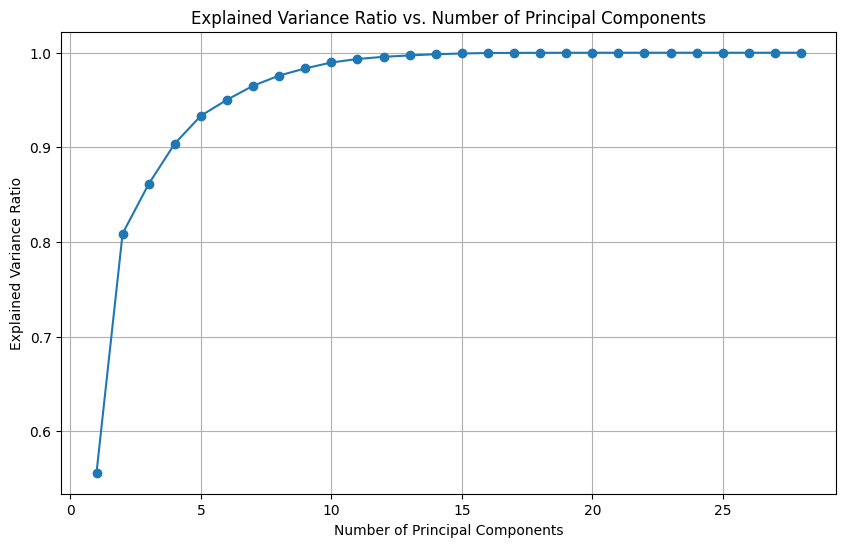

          PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0    -4.761518  0.705379  0.989621  1.359001 -0.305807 -0.465252  0.390279   
1    -4.694228 -0.083276  1.162377  0.803311 -0.829710 -0.323020  0.587892   
2    -4.684926 -0.433214  1.281650  0.487922 -0.951935 -0.198866  1.024008   
3    -4.525571 -0.787203  1.380134  0.382077 -0.251228 -0.098943  0.711269   
4    -4.511782 -0.996872  1.247951  0.219934 -0.488568 -0.243139  0.885079   
...        ...       ...       ...       ...       ...       ...       ...   
1317  6.026426  1.666605 -1.695933  0.104410 -0.866054  0.205457 -0.169348   
1318  6.158789  1.443082 -1.609573 -0.137105 -0.763912  0.140249 -0.563147   
1319  6.165389  1.189305 -1.633271 -0.373952 -0.999439 -0.025968 -0.429824   
1320  6.334288  0.900088 -1.094988 -0.529822 -0.072367  0.112278 -0.083472   
1321  6.134773  1.499525 -1.619684 -0.470815 -0.722066 -0.198355  0.216221   

          PC 8      PC 9     PC 10     PC 11     PC 12     PC 1

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Selecting the features for PCA
features = aubank_data.drop(columns=['Date', 'Target'])



# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Hyperparameter testing for the number of principal components
explained_variance_ratios = []
num_features = range(1, len(features.columns) + 1)

for n in num_features:
    pca = PCA(n_components=n)
    pca.fit(scaled_features)
    explained_variance_ratios.append(sum(pca.explained_variance_ratio_))

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(num_features, explained_variance_ratios, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

# Performing PCA with the optimal number of components (you can choose based on the plot)
optimal_components = 13  # Change this based on the plot
pca = PCA(n_components=optimal_components)
principal_components = pca.fit_transform(scaled_features)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC {i+1}' for i in range(optimal_components)])

# Adding the date and target columns to the PCA DataFrame
pca_df['Date'] = aubank_data['Date']
pca_df['Target'] = aubank_data['Target']

print(pca_df)

In [12]:
pca_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,Date,Target
0,-4.761518,0.705379,0.989621,1.359001,-0.305807,-0.465252,0.390279,0.834717,-0.367757,0.743379,0.079532,0.059056,-0.103470,2017-08-29,0.00
1,-4.694228,-0.083276,1.162377,0.803311,-0.829710,-0.323020,0.587892,0.787388,-0.010206,0.961482,0.045206,-0.017042,-0.068746,2017-08-30,0.53
2,-4.684926,-0.433214,1.281650,0.487922,-0.951935,-0.198866,1.024008,0.658220,-0.055787,0.891507,0.013281,-0.027874,-0.036422,2017-08-31,0.50
3,-4.525571,-0.787203,1.380134,0.382077,-0.251228,-0.098943,0.711269,0.525808,-0.468123,0.170234,0.538297,0.026149,0.003017,2017-09-01,0.51
4,-4.511782,-0.996872,1.247951,0.219934,-0.488568,-0.243139,0.885079,0.491716,-0.241914,0.346426,0.376298,-0.015686,0.054790,2017-09-04,0.52


In [50]:
news_data = pd.read_csv('data/news/daily_sentiment.csv')
news_data.head()

# Convert the 'Date' columns to datetime format for both DataFrames
news_data['Date'] = pd.to_datetime(news_data['Date'])
pca_df['Date'] = pd.to_datetime(pca_df['Date'])

# Filter news_data to keep only the rows with dates present in pca_df
filtered_news_data = news_data[news_data['Date'].isin(pca_df['Date'])]

# Reset the index of the filtered DataFrame
filtered_news_data.reset_index(drop=True, inplace=True)

print(filtered_news_data)



          Date Daily_Sentiment
0   2018-01-01         Neutral
1   2018-01-02         Neutral
2   2018-01-03         Neutral
3   2018-01-04         Neutral
4   2018-01-05         Neutral
..         ...             ...
573 2020-05-19         Neutral
574 2020-05-20         Neutral
575 2020-05-21        Negative
576 2020-05-22         Neutral
577 2020-05-26         Neutral

[578 rows x 2 columns]


In [52]:
# Merge pca_df and filtered_news_data on the 'Date' column
combined_df = pd.merge(pca_df, filtered_news_data, on='Date', how='inner')

combined_df


,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,Date,Target,Daily_Sentiment_x,Sentiment_Label,Daily_Sentiment_y
0,-2.982805,1.978402,-2.198418,-0.512346,0.536655,0.264951,-0.432075,-0.500445,-0.052044,-0.148288,-0.059669,0.214988,-0.085493,2018-01-01,0.49,Neutral,0,Neutral
1,-3.045867,2.294321,-2.260089,-0.457557,0.568953,0.299640,-0.541198,-0.355993,0.078547,-0.088285,-0.001613,0.138374,-0.107065,2018-01-02,0.50,Neutral,0,Neutral
2,-3.000151,1.758818,-1.935508,-0.710845,0.420745,0.390122,-0.585726,-0.077431,0.530460,0.345852,-0.137150,0.065042,-0.059960,2018-01-03,0.53,Neutral,0,Neutral
3,-2.935524,1.151543,-1.583807,-0.962817,0.260099,0.440916,-0.388483,0.044190,0.724762,0.560005,-0.279445,0.043592,-0.021388,2018-01-04,0.52,Neutral,0,Neutral
4,-2.585466,-0.918231,-0.509054,-1.490076,0.221634,0.349041,-0.534168,-0.110935,0.987261,0.997636,-0.402921,0.277577,0.048661,2018-01-05,0.60,Neutral,0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,-6.654853,5.039265,1.588431,0.436970,-0.196136,1.507685,-1.174940,-1.248816,-1.022783,0.315499,0.468676,0.202504,-0.058698,2020-05-19,0.47,Neutral,0,Neutral
574,-6.693468,4.818114,1.476372,0.283886,-0.322887,1.691750,-1.360006,-1.100792,-0.706744,0.475444,0.341479,0.085316,-0.017782,2020-05-20,0.57,Neutral,0,Neutral
575,-6.486219,4.013079,1.765057,0.101657,-0.043993,1.723455,-1.578487,-0.996029,-0.547172,0.803682,0.125998,0.117235,-0.071320,2020-05-21,0.58,Negative,-1,Negative
576,-6.572241,4.170308,1.555120,0.105278,0.077966,1.792384,-1.380304,-1.010857,-0.766019,0.367347,0.270024,0.025726,-0.080278,2020-05-22,0.44,Neutral,0,Neutral


In [53]:

# Define a mapping for the sentiment labels
sentiment_mapping = {
    'Positive': 1,
    'Neutral': 0,
    'Negative': -1
}

# Apply the mapping to the 'Daily_Sentiment' column
combined_df['Sentiment_Label'] = combined_df['Daily_Sentiment_x'].map(sentiment_mapping)

# Display the updated DataFrame
print(combined_df[['Date', 'Daily_Sentiment_x', 'Sentiment_Label']].head())


pca_df = combined_df

        Date Daily_Sentiment_x  Sentiment_Label
0 2018-01-01           Neutral                0
1 2018-01-02           Neutral                0
2 2018-01-03           Neutral                0
3 2018-01-04           Neutral                0
4 2018-01-05           Neutral                0


In [54]:
pca_df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,Date,Target,Daily_Sentiment_x,Sentiment_Label,Daily_Sentiment_y
0,-2.982805,1.978402,-2.198418,-0.512346,0.536655,0.264951,-0.432075,-0.500445,-0.052044,-0.148288,-0.059669,0.214988,-0.085493,2018-01-01,0.49,Neutral,0,Neutral
1,-3.045867,2.294321,-2.260089,-0.457557,0.568953,0.299640,-0.541198,-0.355993,0.078547,-0.088285,-0.001613,0.138374,-0.107065,2018-01-02,0.50,Neutral,0,Neutral
2,-3.000151,1.758818,-1.935508,-0.710845,0.420745,0.390122,-0.585726,-0.077431,0.530460,0.345852,-0.137150,0.065042,-0.059960,2018-01-03,0.53,Neutral,0,Neutral
3,-2.935524,1.151543,-1.583807,-0.962817,0.260099,0.440916,-0.388483,0.044190,0.724762,0.560005,-0.279445,0.043592,-0.021388,2018-01-04,0.52,Neutral,0,Neutral
4,-2.585466,-0.918231,-0.509054,-1.490076,0.221634,0.349041,-0.534168,-0.110935,0.987261,0.997636,-0.402921,0.277577,0.048661,2018-01-05,0.60,Neutral,0,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,-6.654853,5.039265,1.588431,0.436970,-0.196136,1.507685,-1.174940,-1.248816,-1.022783,0.315499,0.468676,0.202504,-0.058698,2020-05-19,0.47,Neutral,0,Neutral
574,-6.693468,4.818114,1.476372,0.283886,-0.322887,1.691750,-1.360006,-1.100792,-0.706744,0.475444,0.341479,0.085316,-0.017782,2020-05-20,0.57,Neutral,0,Neutral
575,-6.486219,4.013079,1.765057,0.101657,-0.043993,1.723455,-1.578487,-0.996029,-0.547172,0.803682,0.125998,0.117235,-0.071320,2020-05-21,0.58,Negative,-1,Negative
576,-6.572241,4.170308,1.555120,0.105278,0.077966,1.792384,-1.380304,-1.010857,-0.766019,0.367347,0.270024,0.025726,-0.080278,2020-05-22,0.44,Neutral,0,Neutral


In [56]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
import torch.nn as nn
import torch.optim as optim

# Prepare the data
X = pca_df.drop(columns=['Date', 'Target', 'Daily_Sentiment_x',  'Daily_Sentiment_y']).values
y = pca_df['Target'].values

# Determine the split index
split_index = int(0.8 * len(pca_df))

# Get the indices
train_indices = pca_df.index[:split_index]
test_indices = pca_df.index[split_index:]

# Split the data manually
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_size = 50
num_layers = 2
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch = X_batch.unsqueeze(1)  # Add sequence dimension
        y_batch = y_batch.unsqueeze(1)
        
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.unsqueeze(1)  # Add sequence dimension
        outputs = model(X_batch)
        y_pred.extend(outputs.squeeze().tolist())
        y_true.extend(y_batch.tolist())

# Calculate accuracy or other metrics as needed
mse = mean_squared_error(y_true, y_pred)
print(f'Mean Squared Error: {mse:.4f}')


Epoch [1/50], Loss: 0.1311
Epoch [2/50], Loss: 0.0312
Epoch [3/50], Loss: 0.0065
Epoch [4/50], Loss: 0.0075
Epoch [5/50], Loss: 0.0024
Epoch [6/50], Loss: 0.0006
Epoch [7/50], Loss: 0.0019
Epoch [8/50], Loss: 0.0011
Epoch [9/50], Loss: 0.0009
Epoch [10/50], Loss: 0.0007
Epoch [11/50], Loss: 0.0003
Epoch [12/50], Loss: 0.0006
Epoch [13/50], Loss: 0.0015
Epoch [14/50], Loss: 0.0008
Epoch [15/50], Loss: 0.0009
Epoch [16/50], Loss: 0.0003
Epoch [17/50], Loss: 0.0007
Epoch [18/50], Loss: 0.0009
Epoch [19/50], Loss: 0.0013
Epoch [20/50], Loss: 0.0005
Epoch [21/50], Loss: 0.0008
Epoch [22/50], Loss: 0.0016
Epoch [23/50], Loss: 0.0013
Epoch [24/50], Loss: 0.0007
Epoch [25/50], Loss: 0.0007
Epoch [26/50], Loss: 0.0007
Epoch [27/50], Loss: 0.0021
Epoch [28/50], Loss: 0.0004
Epoch [29/50], Loss: 0.0005
Epoch [30/50], Loss: 0.0008
Epoch [31/50], Loss: 0.0006
Epoch [32/50], Loss: 0.0010
Epoch [33/50], Loss: 0.0014
Epoch [34/50], Loss: 0.0018
Epoch [35/50], Loss: 0.0012
Epoch [36/50], Loss: 0.0004
E

In [57]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

Mean Absolute Error: 0.0947


In [58]:
# Extract the dates corresponding to the test set using the test_indices
test_dates = pca_df.loc[test_indices, 'Date'].values

# Print the date, predicted, and actual values
for date, pred, actual in zip(test_dates, y_pred, y_true):
    print(f"Date: {date}, Predicted: {pred:.4f}, Actual: {actual:.4f}")

Date: 2019-12-04T00:00:00.000000000, Predicted: 0.4576, Actual: 0.5100
Date: 2019-12-05T00:00:00.000000000, Predicted: 0.4786, Actual: 0.4900
Date: 2019-12-06T00:00:00.000000000, Predicted: 0.5045, Actual: 0.5000
Date: 2019-12-09T00:00:00.000000000, Predicted: 0.5013, Actual: 0.5000
Date: 2019-12-10T00:00:00.000000000, Predicted: 0.5382, Actual: 0.4700
Date: 2019-12-11T00:00:00.000000000, Predicted: 0.5432, Actual: 0.5100
Date: 2019-12-12T00:00:00.000000000, Predicted: 0.5153, Actual: 0.5000
Date: 2019-12-13T00:00:00.000000000, Predicted: 0.4770, Actual: 0.4900
Date: 2019-12-16T00:00:00.000000000, Predicted: 0.4905, Actual: 0.5000
Date: 2019-12-17T00:00:00.000000000, Predicted: 0.4999, Actual: 0.5100
Date: 2019-12-18T00:00:00.000000000, Predicted: 0.5013, Actual: 0.4900
Date: 2019-12-19T00:00:00.000000000, Predicted: 0.5023, Actual: 0.5000
Date: 2019-12-20T00:00:00.000000000, Predicted: 0.4949, Actual: 0.5100
Date: 2019-12-23T00:00:00.000000000, Predicted: 0.4976, Actual: 0.4800
Date: 

In [59]:
import pandas as pd

# Extract the dates corresponding to the test set
test_dates = pca_df.loc[test_indices, 'Date'].values

# Create a DataFrame with Date, Predicted, and Actual columns
results_df = pd.DataFrame({
    'Date': test_dates,
    'Predicted': y_pred,
    'Actual': y_true
})

# Print the DataFrame (optional)
print(results_df)


          Date  Predicted  Actual
0   2019-12-04   0.457585    0.51
1   2019-12-05   0.478637    0.49
2   2019-12-06   0.504516    0.50
3   2019-12-09   0.501274    0.50
4   2019-12-10   0.538180    0.47
..         ...        ...     ...
111 2020-05-19   0.485512    0.47
112 2020-05-20   0.511379    0.57
113 2020-05-21   0.542421    0.58
114 2020-05-22   0.500617    0.44
115 2020-05-26   0.486396    0.45

[116 rows x 3 columns]


In [17]:
folder_path = 'data/new_label_dataset/'

In [18]:
bank_nifty_stock_symbols = [
    "HDFCBANK.NS",
    "AXISBANK.NS",
    "ICICIBANK.NS",
    "HDFCBANK.NS",
    "KOTAKBANK.NS",
    "SBIN.NS",
    "INDUSINDBK.NS",
    "BANDHANBNK.NS",
    "FEDERALBNK.NS",
    "PNB.NS",
    "IDFCFIRSTB.NS",
    "BANKBARODA.NS",
    "AUBANK.NS"
]

In [19]:
def get_stock_maximums(folder_path):
    stock_maximums = {}

    for stock_symbol in bank_nifty_stock_symbols:
        stock_df = pd.read_csv(f"{folder_path}{stock_symbol}.csv")
        maximum_rise_in_price_in_consecutive_days = 0
        maximum_fall_in_price_in_consecutive_days = 0

        for i in range(1, stock_df.shape[0]):
            price_change = stock_df['Close'][i] - stock_df['Close'][i-1]
            if price_change > 0:
                maximum_rise_in_price_in_consecutive_days = max(maximum_rise_in_price_in_consecutive_days, price_change)
            else:
                maximum_fall_in_price_in_consecutive_days = max(maximum_fall_in_price_in_consecutive_days, abs(price_change))

        stock_maximums[stock_symbol] = (maximum_rise_in_price_in_consecutive_days, maximum_fall_in_price_in_consecutive_days)

    return stock_maximums

In [20]:
stock_maximums = get_stock_maximums(folder_path)

In [42]:
stock_maximums

{'HDFCBANK.NS': (150.800048828125, 111.29998779296875),
 'AXISBANK.NS': (74.550048828125, 119.5),
 'ICICIBANK.NS': (82.4000244140625, 61.70001220703125),
 'KOTAKBANK.NS': (170.75, 164.0999755859375),
 'SBIN.NS': (70.44999694824219, 32.5),
 'INDUSINDBK.NS': (137.3499755859375, 143.3500366210937),
 'BANDHANBNK.NS': (76.85000610351562, 113.0499877929687),
 'FEDERALBNK.NS': (14.150001525878906, 12.80000305175782),
 'PNB.NS': (63.850006103515625, 17.600006103515625),
 'IDFCFIRSTB.NS': (5.69999694824218, 6.200000762939453),
 'BANKBARODA.NS': (45.00000000000003, 22.150001525878906),
 'AUBANK.NS': (60.20001220703125, 82.07501220703125)}

In [43]:
aubank_data = stock_maximums['AUBANK.NS']

In [44]:
aubank_max_rise, aubank_max_fall = aubank_data

In [45]:
print(y_test)

[0.52 0.48 0.5  0.54 0.46 0.47 0.38 0.17 0.65 0.47 0.57 0.45 0.43 0.44
 0.6  0.63 0.48 0.62 0.63 0.81 0.49 0.72 0.56 0.77 0.5  0.55 0.36 0.55
 0.45 0.52 0.47 0.51 0.42 0.57 0.62 0.49 0.66 0.66 0.71 0.45 0.39 0.49
 0.49 0.64 0.55 0.32 0.3  0.72 0.41 0.48 0.47 0.5  0.5  0.55 0.21 0.73
 0.41 0.52 0.34 0.4  0.32 0.64 0.69 0.57 0.63 0.28 0.7  0.54 0.45 0.56
 0.58 0.66 0.52 0.39 0.54 0.5  0.46 0.68 0.67 0.59 0.53 0.59 0.61 0.61
 0.53 0.52 0.51 0.43 0.67 0.5  0.56 0.31 0.49 0.69 0.34 0.69 0.44 0.44
 0.37 0.6  0.4  0.39 0.45 0.55 0.39 0.73 0.55 0.54 0.4  0.43 0.71 0.62
 0.45 0.39 0.64 0.47 0.45 0.36 0.64 0.56 0.38 0.52 0.51 0.46 0.4  0.44
 0.41 0.62 0.7  0.48 0.49 0.44 0.49 0.42 0.6  0.53 0.58 0.49 0.34 0.47
 0.42 0.41 0.46 0.71 0.53 0.48 0.52 0.45 0.46 0.4  0.47 0.56 0.57 0.59
 0.58 0.47 0.5  0.51 0.5  0.57 0.51 0.61 0.61 0.45 0.72 0.59 0.52 0.47
 0.5  0.42 0.57 0.55 0.49 0.46 0.49 0.58 0.54 0.48 0.46 0.45 0.5  0.62
 0.48 0.56 0.49 0.44 0.57 0.53 0.57 0.62 0.52 0.53 0.36 0.47 0.61 0.5
 0.48 0

In [46]:
print(y_pred)

[0.5845491886138916, 0.5411509871482849, 0.5188944339752197, 0.5360150933265686, 0.542601466178894, 0.5061284303665161, 0.3802199959754944, 0.2947728931903839, 0.5036602020263672, 0.5167276859283447, 0.5631510019302368, 0.5176487565040588, 0.5224940180778503, 0.490315318107605, 0.5465726852416992, 0.6195221543312073, 0.5370209217071533, 0.5782157182693481, 0.6193392276763916, 0.8731112480163574, 0.6199604272842407, 0.7138293981552124, 0.6302860975265503, 0.7153814435005188, 0.5662825107574463, 0.5633867979049683, 0.43563613295555115, 0.49497008323669434, 0.4902951717376709, 0.5227811932563782, 0.5118763446807861, 0.5345093011856079, 0.43887215852737427, 0.5253571271896362, 0.6431594491004944, 0.5567883253097534, 0.7332296371459961, 0.7259960770606995, 0.7029000520706177, 0.5395166873931885, 0.43999743461608887, 0.4830729365348816, 0.5216156840324402, 0.6145175695419312, 0.6273853778839111, 0.4641845226287842, 0.3532710075378418, 0.5485492944717407, 0.4867018461227417, 0.519552230834960

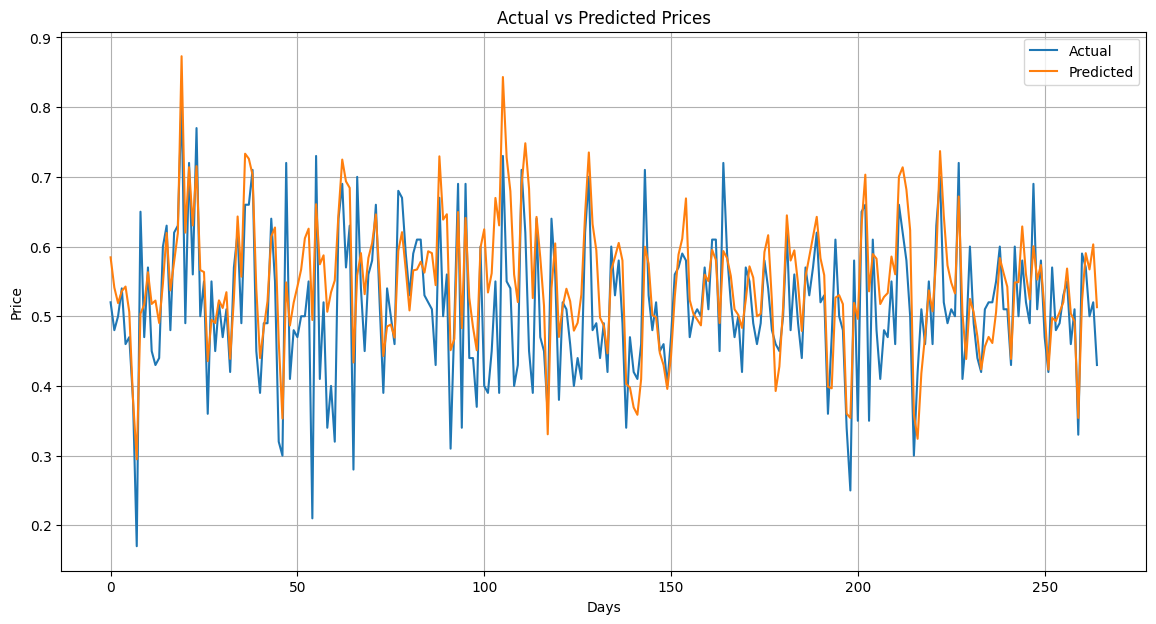

In [47]:
# create a plot to compare actual vs predicted prices

import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
aubank_data = pd.DataFrame(aubank_data)

In [28]:
old_close = 580.099

In [29]:
predicted_prices = []

In [30]:
for i in range(0, len(y_pred)):
    current_val = y_pred[i]

    if(current_val > 0.5):
        new_value = old_close +  (((current_val - 0.5)*2) * aubank_max_rise) 

    else:
        new_value = old_close -  (((0.5 - current_val)*2) * aubank_max_fall)

    
    predicted_prices.append(new_value)
    old_close = new_value

In [31]:
aubank_data_new = pd.read_csv(f'{folder_path}/AUBANK.NS.csv')

In [32]:
print(aubank_data_new.columns)

aubank_data.head(20)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_9',
       'SMA_21', 'EMA_9', 'EMA_21', 'DEMA_9', 'DEMA_21', 'MACD_Line',
       'MACD_Signal_Line', 'RSI_14', 'Stoch_Oscillator_K',
       'Stoch_Oscillator_D', 'BB_middle', 'BB_upper', 'BB_lower', 'ADX',
       'ADX+DI', 'ADX-DI', 'CMF', 'OBV', 'CCI', 'Williams_%R', 'ATR',
       'Target'],
      dtype='object')


,0
0,60.200012
1,82.075012


In [33]:
# get the close prices for the test data
close_prices = aubank_data_new.loc[test_indices, 'Close'].values

In [34]:
print(close_prices)

[582.57501221 579.97497559 580.15002441 584.45001221 578.25
 573.77502441 554.5        499.75       518.29998779 513.54998779
 522.42498779 513.875      502.6000061  493.04998779 505.57501221
 521.67498779 518.25       532.65002441 547.95001221 584.67498779
 583.52502441 610.5        617.17498779 649.40002441 648.65002441
 654.20001221 631.20001221 636.95001221 629.15002441 632.07501221
 627.02502441 628.34997559 614.75       623.22497559 637.84997559
 635.77502441 654.77502441 673.5        698.40002441 690.42498779
 671.95001221 669.5        667.17498779 683.45001221 688.97497559
 660.15002441 626.875      653.54998779 638.22497559 634.82501221
 630.54998779 631.02502441 630.5        636.72497559 589.77502441
 617.34997559 601.79998779 604.67498779 579.07501221 562.52502441
 532.45001221 549.17498779 572.54998779 581.04998779 596.52502441
 560.54998779 584.75       589.42498779 581.70001221 588.875
 598.02502441 617.875      620.72497559 603.         607.375
 607.82501221 601.09997559

In [35]:
print(predicted_prices)

[590.2787243733018, 595.233304230618, 597.5081945425244, 601.844412658318, 606.9736302263317, 607.7114933920801, 588.049602807141, 554.3615682139151, 554.8022566272501, 556.8162704214136, 564.4196525955866, 566.5445633095532, 569.2528436352967, 567.6631028662176, 573.2704553063467, 587.6609256058454, 592.1182454832177, 601.5354198724107, 615.9038657982036, 660.8264691685343, 675.2697075422783, 701.0147723006102, 716.7012216236197, 742.6331526794182, 750.6135685928401, 758.2453406081275, 747.6800102613978, 746.8543493019005, 745.2613015057049, 748.0041577299543, 749.4340699194707, 753.5889906247302, 743.5548539546197, 746.6078526873224, 763.8442538541257, 770.6815696078537, 798.7624236143146, 825.9723568099051, 850.4015280328221, 855.1593381597248, 845.3099155870494, 842.5313377059919, 845.1338665912243, 858.9217847599119, 874.2589873671294, 868.379875882243, 844.294308187329, 850.1396444270121, 847.9567521433981, 850.3108412132768, 855.4305931087855, 863.5137320216289, 876.990675219383

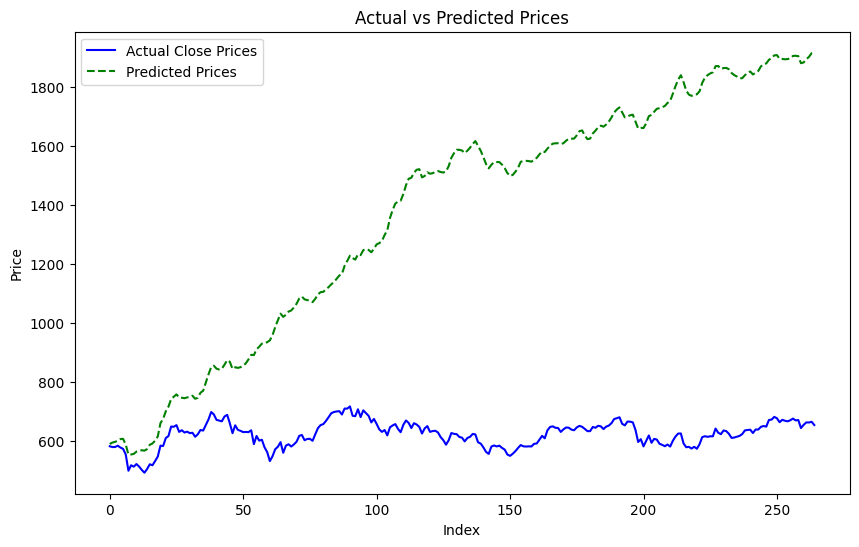

In [40]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Plot actual close prices
plt.plot(close_prices, label='Actual Close Prices', color='blue', linestyle='-')

# Plot predicted prices
plt.plot(predicted_prices, label='Predicted Prices', color='green', linestyle='--')

# #delta change in price
# plt.plot(np.abs(np.array(predicted_prices) - np.array(close_prices)), label='Delta Change in Price', color='red', linestyle='-.')

# Add title and labels
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')

# Add a legend to differentiate the two lines
plt.legend()

# Display the plot
plt.show()

In [37]:
import matplotlib.pyplot as plt

plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Pdogg Windows10\\Desktop\\Semester 7\\Natural Language Processing\\Project\\nlp\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [38]:
print(y_pred)

[0.5845491886138916, 0.5411509871482849, 0.5188944339752197, 0.5360150933265686, 0.542601466178894, 0.5061284303665161, 0.3802199959754944, 0.2947728931903839, 0.5036602020263672, 0.5167276859283447, 0.5631510019302368, 0.5176487565040588, 0.5224940180778503, 0.490315318107605, 0.5465726852416992, 0.6195221543312073, 0.5370209217071533, 0.5782157182693481, 0.6193392276763916, 0.8731112480163574, 0.6199604272842407, 0.7138293981552124, 0.6302860975265503, 0.7153814435005188, 0.5662825107574463, 0.5633867979049683, 0.43563613295555115, 0.49497008323669434, 0.4902951717376709, 0.5227811932563782, 0.5118763446807861, 0.5345093011856079, 0.43887215852737427, 0.5253571271896362, 0.6431594491004944, 0.5567883253097534, 0.7332296371459961, 0.7259960770606995, 0.7029000520706177, 0.5395166873931885, 0.43999743461608887, 0.4830729365348816, 0.5216156840324402, 0.6145175695419312, 0.6273853778839111, 0.4641845226287842, 0.3532710075378418, 0.5485492944717407, 0.4867018461227417, 0.519552230834960

In [39]:
print(y_test)

[0.52 0.48 0.5  0.54 0.46 0.47 0.38 0.17 0.65 0.47 0.57 0.45 0.43 0.44
 0.6  0.63 0.48 0.62 0.63 0.81 0.49 0.72 0.56 0.77 0.5  0.55 0.36 0.55
 0.45 0.52 0.47 0.51 0.42 0.57 0.62 0.49 0.66 0.66 0.71 0.45 0.39 0.49
 0.49 0.64 0.55 0.32 0.3  0.72 0.41 0.48 0.47 0.5  0.5  0.55 0.21 0.73
 0.41 0.52 0.34 0.4  0.32 0.64 0.69 0.57 0.63 0.28 0.7  0.54 0.45 0.56
 0.58 0.66 0.52 0.39 0.54 0.5  0.46 0.68 0.67 0.59 0.53 0.59 0.61 0.61
 0.53 0.52 0.51 0.43 0.67 0.5  0.56 0.31 0.49 0.69 0.34 0.69 0.44 0.44
 0.37 0.6  0.4  0.39 0.45 0.55 0.39 0.73 0.55 0.54 0.4  0.43 0.71 0.62
 0.45 0.39 0.64 0.47 0.45 0.36 0.64 0.56 0.38 0.52 0.51 0.46 0.4  0.44
 0.41 0.62 0.7  0.48 0.49 0.44 0.49 0.42 0.6  0.53 0.58 0.49 0.34 0.47
 0.42 0.41 0.46 0.71 0.53 0.48 0.52 0.45 0.46 0.4  0.47 0.56 0.57 0.59
 0.58 0.47 0.5  0.51 0.5  0.57 0.51 0.61 0.61 0.45 0.72 0.59 0.52 0.47
 0.5  0.42 0.57 0.55 0.49 0.46 0.49 0.58 0.54 0.48 0.46 0.45 0.5  0.62
 0.48 0.56 0.49 0.44 0.57 0.53 0.57 0.62 0.52 0.53 0.36 0.47 0.61 0.5
 0.48 0